# Communicating Data Findings of Flight Data from 1998-2007
## by Austin Dowd

## Preliminary Wrangling


Data for this Analysis is available at the sources below:

Data Source: http://stat-computing.org/dataexpo/2009/the-data.html

Original Source: The U.S. Department of Transportation's (DOT) Bureau of Transportation Statistics
https://www.transtats.bts.gov/OT_Delay/OT_DelayCause1.asp
        
Download Source: https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/HG7NV7

The Available flight data spans millions of flights over 2 decades. Due to computation limitations of dataframe sizes only the most recent 10 years where data is complete will be examined, which would be years 1998-2007. Before loading the flight data an examination of the variable description csv will provide help in determing the proper method for importing flight data with conservation on memory usage as a consideration.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import glob as glob
import os as os

%matplotlib inline

In [2]:
descript = pd.read_csv('Flight Data//variable-descriptions.csv')

In [3]:
descript.head(30)

,Variable descriptions,Unnamed: 1,Unnamed: 2
0,NaN,NaN,NaN
1,NaN,Name,Description
2,1.0,Year,1987-2008
3,2.0,Month,12-Jan
4,3.0,DayofMonth,31-Jan
5,4.0,DayOfWeek,1 (Monday) - 7 (Sunday)
6,5.0,DepTime,"actual departure time (local, hhmm)"
7,6.0,CRSDepTime,"scheduled departure time (local, hhmm)"
8,7.0,ArrTime,"actual arrival time (local, hhmm)"
9,8.0,CRSArrTime,"scheduled arrival time (local, hhmm)"


Description data shows several columns where datatype assignments can conserve memory usage, as well as columns where null values would impede analysis

In [4]:
#Columns selected to import into dataframe for further analysis
columns = ['Year','Month','DayofMonth','DepTime','ArrTime','UniqueCarrier','FlightNum','TailNum',
           'ActualElapsedTime','AirTime','ArrDelay','DepDelay','Origin','Dest','Distance','TaxiIn','TaxiOut',]

#Columns in which complete data is neccessary for analysis, and null values are not acceptable
neccessary_data = ['Year','Month','DayofMonth','DepTime','ArrTime','UniqueCarrier','FlightNum','TailNum',
                   'ActualElapsedTime','AirTime','ArrDelay','DepDelay','Origin','Dest','Distance']

datatypes = {'UniqueCarrier' : 'str',
             'FlightNum' : 'str',
             'TailNum' : 'str',
             'Origin' : 'str',
             'Dest' : 'str'
            }

In [5]:
flights = pd.DataFrame()

# Path to csv files for use in dataset that includes csv files for flight data from 1998-2007
path = 'Flight Data/Years/'
files = glob.glob(path + '/*.csv')

for file in files:
    df = pd.read_csv(file, index_col=None, header=0, encoding='latin1', usecols = columns)
    
    #Drop rows containing null values in necessary columns
    df = df.dropna(subset=neccessary_data, axis=0)


    
    #appennd DF to Flights
    flights = flights.append(df)
    
flights.reset_index(inplace = True, drop=True)

In [6]:
flights.sample(10)

,Year,Month,DayofMonth,DepTime,ArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut
38873287,2004,10,13,2216.0,710.0,UA,178,N513UA,354.0,329.0,20.0,-4.0,SFO,BOS,2704,5,20
42608960,2005,4,13,859.0,1030.0,DH,1502,N653BR,91.0,71.0,-8.0,-6.0,IAD,TYS,419,3,17
48681001,2006,3,13,749.0,1118.0,UA,38,N595UA,149.0,112.0,-7.0,-6.0,SFO,DEN,967,10,27
54509776,2007,1,14,1350.0,1550.0,OH,5548,N597SW,120.0,95.0,-10.0,0.0,ATL,TTN,701,4,21
347861,1998,1,27,2031.0,2309.0,AA,1418,N585AA,98.0,78.0,-7.0,6.0,ORD,ATL,606,5,15
23692788,2002,5,5,916.0,1052.0,UA,1764,N806UA,96.0,65.0,12.0,1.0,IAD,BOS,413,8,23
39042287,2004,10,26,2124.0,12.0,AA,336,N441AA,108.0,86.0,-19.0,-6.0,ORD,LGA,733,7,15
15465341,2000,11,20,2242.0,28.0,US,1850,N811US,106.0,69.0,-3.0,-3.0,CLT,EWR,529,17,20
37407229,2004,7,12,816.0,848.0,DL,1121,N314DA,92.0,67.0,6.0,2.0,ATL,IND,432,11,14
52948165,2006,10,22,845.0,1017.0,MQ,3173,N814AE,92.0,72.0,2.0,-5.0,SFO,SNA,372,4,16


In [7]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61625072 entries, 0 to 61625071
Data columns (total 17 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Year               int64  
 1   Month              int64  
 2   DayofMonth         int64  
 3   DepTime            float64
 4   ArrTime            float64
 5   UniqueCarrier      object 
 6   FlightNum          int64  
 7   TailNum            object 
 8   ActualElapsedTime  float64
 9   AirTime            float64
 10  ArrDelay           float64
 11  DepDelay           float64
 12  Origin             object 
 13  Dest               object 
 14  Distance           int64  
 15  TaxiIn             int64  
 16  TaxiOut            int64  
dtypes: float64(6), int64(7), object(4)
memory usage: 7.8+ GB


In [8]:
flights.describe()

,Year,Month,DayofMonth,DepTime,ArrTime,FlightNum,ActualElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut
count,6.162507e+07,6.162507e+07,6.162507e+07,6.162507e+07,6.162507e+07,6.162507e+07,6.162507e+07,6.162507e+07,6.162507e+07,6.162507e+07,6.162507e+07,6.162507e+07,6.162507e+07
mean,2.002845e+03,6.511889e+00,1.572866e+01,1.346363e+03,1.492252e+03,1.698031e+03,1.253616e+02,1.035295e+02,7.189996e+00,8.678849e+00,7.346963e+02,6.835764e+00,1.575588e+01
std,2.867654e+00,3.422446e+00,8.791204e+00,4.787330e+02,5.037041e+02,1.642273e+03,7.061291e+01,7.355150e+01,3.394191e+01,3.106080e+01,5.702790e+02,2.675746e+01,1.133570e+01
min,1.998000e+03,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-7.190000e+02,-3.818000e+03,-1.302000e+03,-1.410000e+03,8.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+03,4.000000e+00,8.000000e+00,9.320000e+02,1.114000e+03,5.280000e+02,7.300000e+01,5.400000e+01,-9.000000e+00,-3.000000e+00,3.220000e+02,4.000000e+00,1.000000e+01
50%,2.003000e+03,7.000000e+00,1.600000e+01,1.332000e+03,1.521000e+03,1.190000e+03,1.060000e+02,8.500000e+01,-1.000000e+00,0.000000e+00,5.810000e+02,5.000000e+00,1.300000e+01
75%,2.005000e+03,9.000000e+00,2.300000e+01,1.737000e+03,1.917000e+03,2.137000e+03,1.570000e+02,1.340000e+02,1.100000e+01,7.000000e+00,9.670000e+02,7.000000e+00,1.800000e+01
max,2.007000e+03,1.200000e+01,3.100000e+01,2.930000e+03,2.955000e+03,9.912000e+03,1.879000e+03,3.508000e+03,2.598000e+03,2.601000e+03,4.962000e+03,1.523000e+03,3.905000e+03


In [9]:
flights.nunique()

Year                    10
Month                   12
DayofMonth              31
DepTime               1617
ArrTime               1693
UniqueCarrier           24
FlightNum             8114
TailNum              12991
ActualElapsedTime     1008
AirTime               2187
ArrDelay              1644
DepDelay              1758
Origin                 327
Dest                   323
Distance              1574
TaxiIn                1236
TaxiOut                665
dtype: int64

The size of this dataset is significant with over 60 million entries spannning 10 years. To allow enough resources for processing the data and running analysis a smaller sample of the data will be used, and the main dataset deleted to free up available memory and processor power.

In [10]:
data = flights.sample(580000, replace=True)
del flights

In [11]:
data.head()

,Year,Month,DayofMonth,DepTime,ArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut
57318267,2007,5,31,1452.0,1618.0,CO,1132,N11612,86.0,37.0,38.0,22.0,EWR,BOS,200,6,43
31487123,2003,9,21,1634.0,1947.0,UA,508,N556UA,133.0,116.0,-18.0,-1.0,SEA,DEN,1024,6,11
8972456,1999,9,2,641.0,741.0,AA,1551,N2CYAA,120.0,103.0,-16.0,-4.0,SWF,ORD,714,7,10
48310860,2006,2,8,837.0,1013.0,AA,402,N582AA,96.0,69.0,-10.0,-3.0,MCI,DFW,460,10,17
6123680,1999,3,6,2040.0,2253.0,CO,1445,N17317,253.0,227.0,-5.0,1.0,IAH,SJC,1608,6,20


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 580000 entries, 57318267 to 59168143
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Year               580000 non-null  int64  
 1   Month              580000 non-null  int64  
 2   DayofMonth         580000 non-null  int64  
 3   DepTime            580000 non-null  float64
 4   ArrTime            580000 non-null  float64
 5   UniqueCarrier      580000 non-null  object 
 6   FlightNum          580000 non-null  int64  
 7   TailNum            580000 non-null  object 
 8   ActualElapsedTime  580000 non-null  float64
 9   AirTime            580000 non-null  float64
 10  ArrDelay           580000 non-null  float64
 11  DepDelay           580000 non-null  float64
 12  Origin             580000 non-null  object 
 13  Dest               580000 non-null  object 
 14  Distance           580000 non-null  int64  
 15  TaxiIn             580000 non-null  int64 

In [13]:
data.describe()

,Year,Month,DayofMonth,DepTime,ArrTime,FlightNum,ActualElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut
count,580000.000000,580000.000000,580000.000000,580000.000000,580000.000000,580000.000000,580000.000000,580000.000000,580000.000000,580000.00000,580000.000000,580000.000000,580000.000000
mean,2002.847514,6.508107,15.728272,1345.701284,1491.287836,1696.779862,125.343060,103.506998,7.224383,8.69746,734.338503,6.832071,15.768169
std,2.865073,3.419073,8.797917,478.427691,503.221111,1639.995331,70.442279,73.291617,33.904889,31.00452,568.548763,26.392370,11.806218
min,1998.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,-2690.000000,-564.000000,-1197.00000,21.000000,0.000000,0.000000
25%,2000.000000,4.000000,8.000000,931.000000,1114.000000,528.000000,74.000000,54.000000,-9.000000,-3.00000,324.000000,4.000000,10.000000
50%,2003.000000,7.000000,16.000000,1332.000000,1520.000000,1190.000000,107.000000,85.000000,-1.000000,0.00000,581.000000,5.000000,13.000000
75%,2005.000000,9.000000,23.000000,1736.000000,1916.000000,2136.000000,157.000000,134.000000,11.000000,7.00000,967.000000,7.000000,18.000000
max,2007.000000,12.000000,31.000000,2658.000000,2746.000000,9584.000000,1564.000000,1568.000000,1428.000000,1435.00000,4962.000000,1501.000000,1439.000000


To examine data on flight times and travel time a timestamp format for departures is needed 

In [14]:
#Convert DepTime and ArrTime to strings of 4 characters, then splice them into a string formatted to fit 'hh:mm'
data.DepTime = data.DepTime.astype(str).str.rstrip(r'.0*').str.zfill(4)
data.ArrTime = data.ArrTime.astype(str).str.rstrip(r'.0*').str.zfill(4)
data['DepTime'] = data['DepTime'].str[:2] + ':' +  data['DepTime'].str[2:]
data['ArrTime'] = data['ArrTime'].str[:2] + ':' +  data['ArrTime'].str[2:]

# Several entries have innacurate time data, with some hour values that exceed 24, or minute values exceeding 60
# and need to be dropped

data.drop(data.loc[data.DepTime.astype(str).str[:2].astype(int) >= 24].index, inplace=True)
data.drop(data.loc[data.DepTime.astype(str).str[3:].astype(int) >= 60].index, inplace=True)
data.drop(data.loc[data.ArrTime.astype(str).str[:2].astype(int) >= 24].index, inplace=True)
data.drop(data.loc[data.ArrTime.astype(str).str[3:].astype(int) >= 60].index, inplace=True)

#A column of datetime entries is created using the available time data columns.
data['departure'] = pd.to_datetime({'year' : data['Year'],
                                  'Month': data['Month'],
                                  'Day' : data['DayofMonth'],
                                  'hour' : data.DepTime.astype(str).str[:2],
                                  'minute': data.DepTime.astype(str).str[3:]})

#The now redundant time data columns will be dropped.
data.drop(['Year', 'Month','DayofMonth','DepTime'], axis=1, inplace = True)

One note: Calculating arrival time as a datetime was much simpler, with Actual Elaspsed Time available in total minutes, a simple addition of that time to the departure timestamp should result in an accurate arrival time for flights. However, after execution of the code below, many entries were found to be off by exactly 1 or 2 hours from the time under 'ArrTime', suggesting that original values for arrival times were representative of times in the locations of arrival, which would differ based on factors like time zones and daylight savings time. For the sake of this analysis, the further calculation of an accurate arrival time is unneccessary, as depature time and actual elapsed time should be sufficient for any analysis.

In [15]:
# data['arrival'] = data.departure + pd.to_timedelta(data['ActualElapsedTime'], unit = 'minute')

For ease of reading the dataframe column order will be rearranged to a more logical order

In [16]:
data = data[['FlightNum',
             'UniqueCarrier',
             'TailNum',
             'Origin',
             'Distance',
             'Dest',
             'departure',
             'ActualElapsedTime',
             'ArrTime',
             'AirTime',
             'ArrDelay',
             'DepDelay',
             'TaxiIn',
             'TaxiOut']]

data.reset_index(inplace = True, drop=True)

In [17]:
data.head()

,FlightNum,UniqueCarrier,TailNum,Origin,Distance,Dest,departure,ActualElapsedTime,ArrTime,AirTime,ArrDelay,DepDelay,TaxiIn,TaxiOut
0,1132,CO,N11612,EWR,200,BOS,2007-05-31 14:52:00,86.0,16:18,37.0,38.0,22.0,6,43
1,508,UA,N556UA,SEA,1024,DEN,2003-09-21 16:34:00,133.0,19:47,116.0,-18.0,-1.0,6,11
2,1551,AA,N2CYAA,SWF,714,ORD,1999-09-02 06:41:00,120.0,07:41,103.0,-16.0,-4.0,7,10
3,402,AA,N582AA,MCI,460,DFW,2006-02-08 08:37:00,96.0,10:13,69.0,-10.0,-3.0,10,17
4,1445,CO,N17317,IAH,1608,SJC,1999-03-06 02:04:00,253.0,22:53,227.0,-5.0,1.0,6,20


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519302 entries, 0 to 519301
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   FlightNum          519302 non-null  int64         
 1   UniqueCarrier      519302 non-null  object        
 2   TailNum            519302 non-null  object        
 3   Origin             519302 non-null  object        
 4   Distance           519302 non-null  int64         
 5   Dest               519302 non-null  object        
 6   departure          519302 non-null  datetime64[ns]
 7   ActualElapsedTime  519302 non-null  float64       
 8   ArrTime            519302 non-null  object        
 9   AirTime            519302 non-null  float64       
 10  ArrDelay           519302 non-null  float64       
 11  DepDelay           519302 non-null  float64       
 12  TaxiIn             519302 non-null  int64         
 13  TaxiOut            519302 non-null  int64   

3 additional data sets are available for supplemental data to the flight data including airport, carriers and plane data

In [19]:
airports = pd.read_csv('Flight Data//airports.csv')
carriers = pd.read_csv('Flight Data//carriers.csv')
plane_data = pd.read_csv('Flight Data//plane-data.csv')

In [20]:
airports.sample(5)

,iata,airport,city,state,country,lat,long
526,5NN,Nondalton,Nondalton,AK,USA,59.979043,-154.839694
2256,MIV,Millville Muni,Millville,NJ,USA,39.367806,-75.072222
3328,X60,Williston Municipal,Williston,FL,USA,29.354220,-82.472882
2019,L42,Allen Parish,Oakdale,LA,USA,30.750167,-92.688472
165,1K4,David J. Perry,Goldsby,OK,USA,35.155068,-97.470394


In [21]:
airports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3376 entries, 0 to 3375
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   iata     3376 non-null   object 
 1   airport  3376 non-null   object 
 2   city     3364 non-null   object 
 3   state    3364 non-null   object 
 4   country  3376 non-null   object 
 5   lat      3376 non-null   float64
 6   long     3376 non-null   float64
dtypes: float64(2), object(5)
memory usage: 184.8+ KB


In [22]:
carriers.head()

,Code,Description
0,02Q,Titan Airways
1,04Q,Tradewind Aviation
2,05Q,"Comlux Aviation, AG"
3,06Q,Master Top Linhas Aereas Ltd.
4,07Q,Flair Airlines Ltd.


In [23]:
carriers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1491 entries, 0 to 1490
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Code         1490 non-null   object
 1   Description  1491 non-null   object
dtypes: object(2)
memory usage: 23.4+ KB


In [24]:
plane_data.sample(5)

,tailnum,type,manufacturer,issue_date,model,status,aircraft_type,engine_type,year
156,N12934,Corporation,EMBRAER,02/23/1998,EMB-145EP,Valid,Fixed Wing Multi-Engine,Turbo-Jet,1997
3771,N77867,Corporation,BOEING,06/28/2002,757-33N,Valid,Fixed Wing Multi-Engine,Turbo-Jet,2002
4404,N900EV,Corporation,BOMBARDIER INC,01/24/2002,CL-600-2B19,Valid,Fixed Wing Multi-Engine,Turbo-Fan,2002
3674,N762US,Corporation,AIRBUS INDUSTRIE,08/07/2007,A319-112,Valid,Fixed Wing Multi-Engine,Turbo-Jet,2000
1021,N310UA,Corporation,BOEING,05/12/1987,737-322,Valid,Fixed Wing Multi-Engine,Turbo-Fan,1987


In [25]:
plane_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5029 entries, 0 to 5028
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   tailnum        5029 non-null   object
 1   type           4480 non-null   object
 2   manufacturer   4480 non-null   object
 3   issue_date     4480 non-null   object
 4   model          4480 non-null   object
 5   status         4480 non-null   object
 6   aircraft_type  4480 non-null   object
 7   engine_type    4480 non-null   object
 8   year           4480 non-null   object
dtypes: object(9)
memory usage: 353.7+ KB


In [26]:
plane_data.model.nunique()

167

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519302 entries, 0 to 519301
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   FlightNum          519302 non-null  int64         
 1   UniqueCarrier      519302 non-null  object        
 2   TailNum            519302 non-null  object        
 3   Origin             519302 non-null  object        
 4   Distance           519302 non-null  int64         
 5   Dest               519302 non-null  object        
 6   departure          519302 non-null  datetime64[ns]
 7   ActualElapsedTime  519302 non-null  float64       
 8   ArrTime            519302 non-null  object        
 9   AirTime            519302 non-null  float64       
 10  ArrDelay           519302 non-null  float64       
 11  DepDelay           519302 non-null  float64       
 12  TaxiIn             519302 non-null  int64         
 13  TaxiOut            519302 non-null  int64   

### What is the structure of your dataset?

This dataset is comprised of 4 seperate dataframes, with the primary data, Flight Data, located in 'data'. The other 3, airports, carriers and plane_data provide additional data related to the primary data set.

The Flight Data originally consisted of over 61 million seperate observations with 18 variables each. A sample of that data was taken consisting of around 520,000 observations with a selected 14 variables each for analysis.

Variables for the flight data include 3 main categories of data Plane specific information (flight number, carrier code and tail number), trip information covering location (originating airport, distance traveled and arrival airport) as well as time (timestamp of departure, total trip elapsed time, time in air, arrival time, delays and time taxiiing).

The other three data frames include supplemental information. The carriers data contains only two variables, the carrier code and the description related to that code. The plane data consists of information specific to each plane, including manufacturer, model number, aircraft type, engine type, etc. The airports data consists of location data for each airport represented by an airport code including city, state, longitude and latitude.

### What is/are the main feature(s) of interest in your dataset?

Two features within this data set of particular interest are variables related to location of flight origins and departures, as well as time as it related to departures, in particular times of year or months, and times of the week. Exploration of this dataset will focus on what factors relate to air travel to locations in relation to time of day, time of week, and time of year.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

Features of particular interest in this dataset to explore are: departure variables as timestamps of departure year, month, day and time; airport locations, particularly the longitude and latitude of each airport; and city/state information

## Univariate Exploration

#### Travel Times
The first variables to explore are departure times, by year, month, day and day of the week

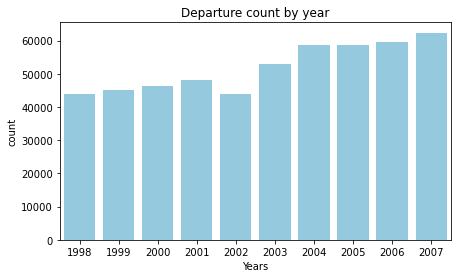

In [28]:
plt.figure(figsize = [7,4])

sb.countplot(data = data, x = data.departure.dt.year, color = 'skyblue')
plt.title("Departure count by year")
plt.xlabel('Years');

One significant standout is the dip in travel in 2002.

In [29]:
year01 = data[data.departure.dt.year == 2001].departure.dt.month
year02 = data[data.departure.dt.year == 2002].departure.dt.month

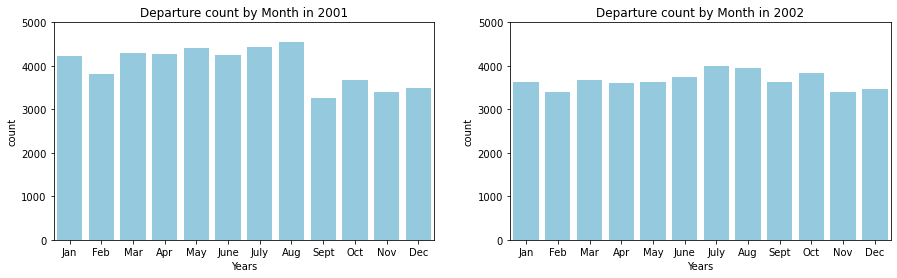

In [30]:
plt.figure(figsize = [15,4])

year01 = data[data.departure.dt.year == 2001].departure.dt.month
year02 = data[data.departure.dt.year == 2002].departure.dt.month

month = ['Jan','Feb','Mar','Apr','May','June','July','Aug','Sept','Oct','Nov','Dec']
month_num = np.arange(0,12,1)

plt.subplot(1,2,1)
sb.countplot(data = data, x = year01, color = 'skyblue')
plt.title("Departure count by Month in 2001")
plt.xticks(month_num, month)
plt.xlabel('Years')
plt.ylim(0,5000)

plt.subplot(1,2,2)
sb.countplot(data = data, x = year02, color = 'skyblue')
plt.title("Departure count by Month in 2002")
plt.xticks(month_num, month)
plt.xlabel('Years')
plt.ylim(0,5000);

The drop off in flight counts for 2002 corresponds with a drop in flights the previous September in 2001, which 

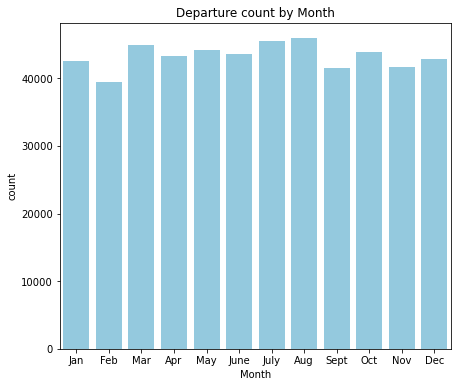

In [31]:
plt.figure(figsize = [7,6])

month = ['Jan','Feb','Mar','Apr','May','June','July','Aug','Sept','Oct','Nov','Dec']
month_num = np.arange(0,12,1)

sb.countplot(data = data, x =data.departure.dt.month , color = 'skyblue')
plt.title("Departure count by Month")
plt.xticks(month_num, month)
plt.xlabel('Month');

Months with the highest travel are July and August, while February and September make up the lowest. Seeing as February is the shortest month of the year could affect its monthly count.

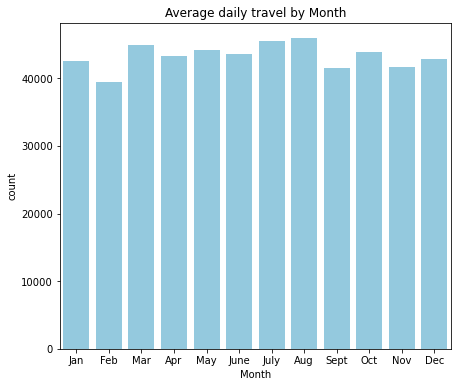

In [32]:
plt.figure(figsize = [7,6])

month = ['Jan','Feb','Mar','Apr','May','June','July','Aug','Sept','Oct','Nov','Dec']
month_num = np.arange(0,12,1)

sb.countplot(data = data, x =data.departure.dt.month , color = 'skyblue')
plt.title("Average daily travel by Month")
plt.xticks(month_num, month)
plt.xlabel('Month');

In [33]:
timedata = pd.DataFrame()
timedata[['FlightNum','departure']] = data[['FlightNum','departure']]
timedata['month'] = data.departure.dt.month
timedata['day'] = data.departure.dt.day

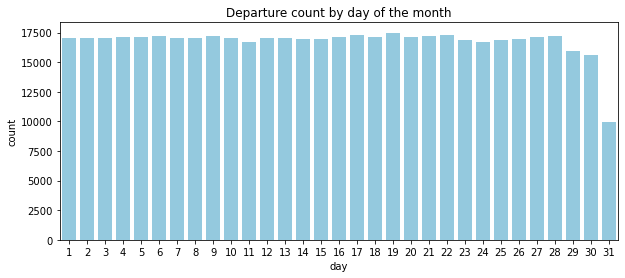

In [34]:
plt.figure(figsize = [10,4])

sb.countplot(data = data, x = data.departure.dt.day, color = 'skyblue')
plt.title("Departure count by day of the month")
plt.xlabel('day');

The first significat observation in this data is a drop on day 31. Seeing as only 7 months of the year have a 31st day, that drop in count isn't surprising.

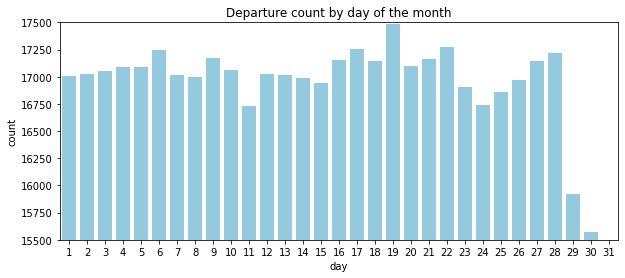

In [35]:
plt.figure(figsize = [10,4])

sb.countplot(data = data, x = data.departure.dt.day, color = 'skyblue')
plt.title("Departure count by day of the month")
plt.xlabel('day')
plt.ylim(15500,17500);

A plot of counts by day with an adjust y axis limit of values between 15,500 and 17,500 shows a bit more variance in day to day travel counts. Another significant drop at the end of the month on days 29 & 30, which is not surprising as February's count would end on day 28 most years, and 29 only every 4.

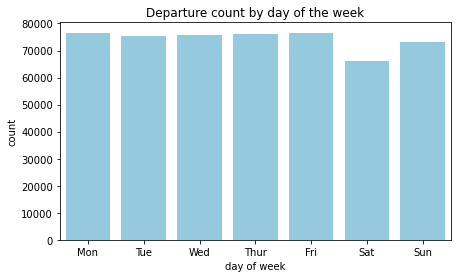

In [36]:
plt.figure(figsize = [7,4])

day = ['Mon','Tue','Wed','Thur','Fri','Sat','Sun']
day_num = np.arange(0,7,1)

sb.countplot(data = data, x =data.departure.dt.dayofweek , color = 'skyblue')
plt.title("Departure count by day of the week")
plt.xticks(day_num, day)
plt.xlabel('day of week');

The histogram for travel count by day of week shows a clear drop off in travel on the weekends, with Saturday being the lowest count and Sunday being the second. Variance between other days is difficult to discern due to the scaling of the y axis

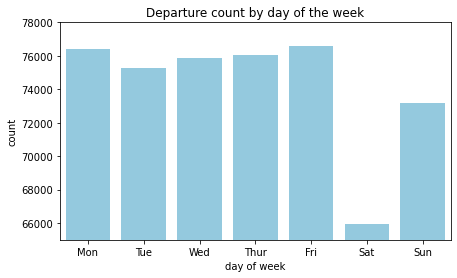

In [37]:
plt.figure(figsize = [7,4])

day = ['Mon','Tue','Wed','Thur','Fri','Sat','Sun']
day_num = np.arange(0,7,1)

sb.countplot(data = data, x =data.departure.dt.dayofweek , color = 'skyblue')
plt.title("Departure count by day of the week")
plt.xticks(day_num, day)
plt.xlabel('day of week')
plt.ylim(65000,78000);

A y axis limit of counts between 65,000 and 78,000 show a slight dip in daily counts mid-weel, with Friday and Monday have the highest count of flights.

#### Location

Another feature of this dataset to examine is the location of flights origins and departures. traffic in and out of airports would have several factors including geographic region and location to large population areas. The airports data frame provides latitude and longitude locations, as well as City and State locations for all airports in the United States.

In [39]:
loc_df = data[['FlightNum','Origin','Dest','departure','Distance']].merge(airports[['iata','city','state','lat','long']], how = 'outer', left_on ='Origin',right_on='iata')

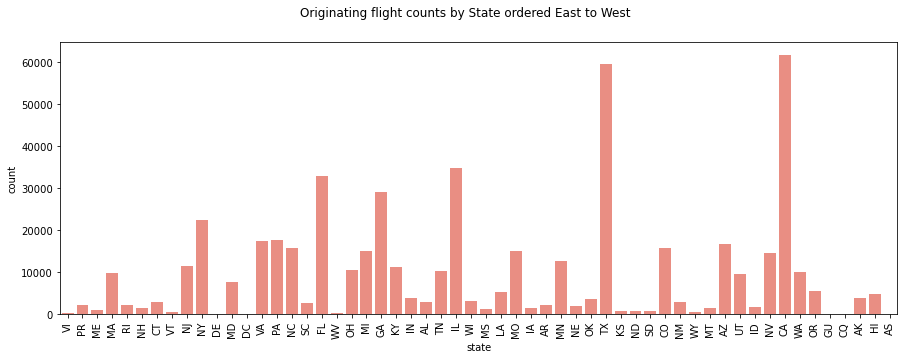

In [40]:
plt.figure(figsize=[15,5])
plt.suptitle('Originating flight counts by State ordered East to West')

loc_df = data[['FlightNum','Origin','Dest','departure','Distance']].merge(airports[['iata','city','state','lat','long']], how = 'outer', left_on ='Origin',right_on='iata')

#create an order of states by location from East to West using the average longitude coordinates of airports within that state.
order = loc_df[['state','long']].groupby('state').long.mean().sort_values(ascending=False).index.tolist()

sb.countplot(data = loc_df, x='state', color='salmon', order = order)
plt.xticks(rotation = 90);

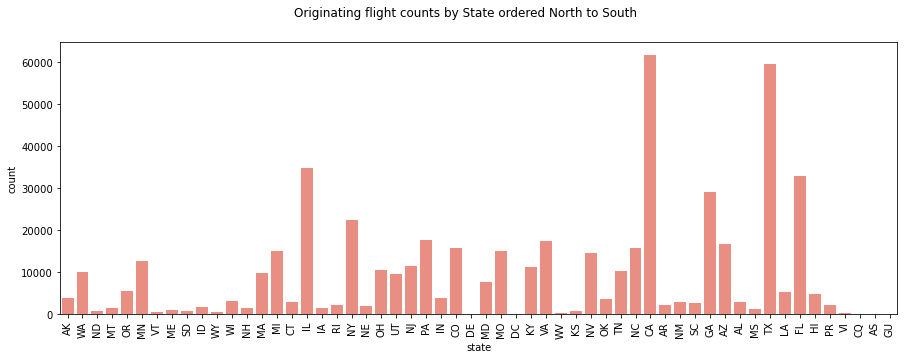

In [41]:
plt.figure(figsize=[15,5])
plt.suptitle('Originating flight counts by State ordered North to South')


#create an order of states by location from North to South using the average longitude coordinates of airports within that state.
order = loc_df[['state','lat']].groupby('state').lat.mean().sort_values(ascending=False).index.tolist()

sb.countplot(data = loc_df, x='state', color='salmon', order = order)
plt.xticks(rotation = 90);

Whether ordered by location data East to West or North to South, a countplot of flights originating in each state show no clear pattern by state location. Texas and California standout as the states with the highest counts of flights originating in their state.

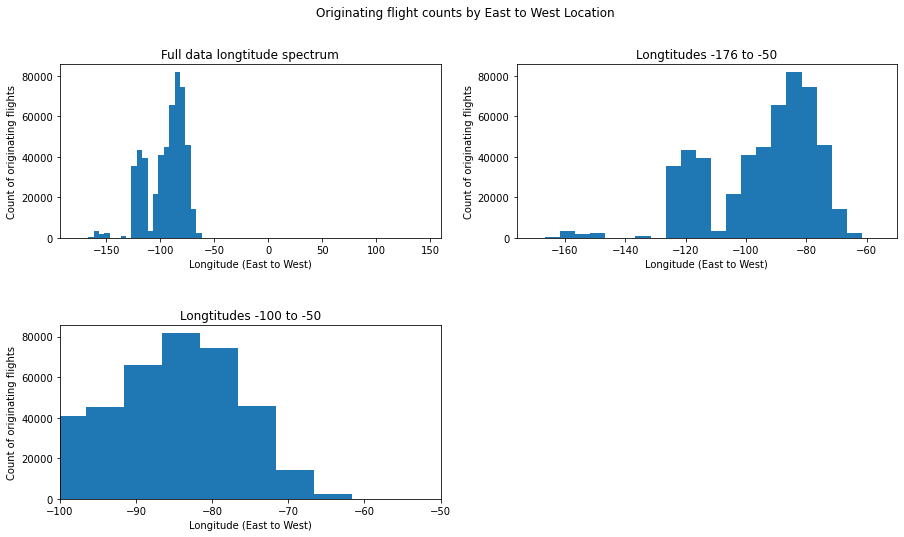

In [42]:
plt.figure(figsize = [15,8])
plt.subplots_adjust(hspace=.5)
plt.suptitle('Originating flight counts by East to West Location')

bins = np.arange(loc_df.long.min(), loc_df.long.max(), 5)

plt.subplot(2,2,1)

plt.hist(data = loc_df, x = 'long', bins=bins)
plt.title('Full data longtitude spectrum')
plt.xlabel('Longitude (East to West)')
plt.ylabel('Count of originating flights')

plt.subplot(2,2,2)
plt.hist(data = loc_df, x = 'long', bins=bins)
plt.xlim(-176,-50)
plt.xlabel('Longitude (East to West)')
plt.ylabel('Count of originating flights')
plt.title('Longtitudes -176 to -50')


plt.subplot(2,2,3)
plt.hist(data = loc_df, x = 'long', bins=bins)
plt.xlim(-100,-50)
plt.xlabel('Longitude (East to West)')
plt.ylabel('Count of originating flights')
plt.title('Longtitudes -100 to -50');


In [43]:
print("States Between longtitudes of -90 and -65 degrees: ", loc_df[(loc_df.long > -90) & (loc_df.long < -65)].state.unique().tolist())
print(" ")
print("States East of longtitude -65 degrees: ",loc_df[(loc_df.long > -65)].state.unique().tolist() )
print(" ")
print("States Between longtitudes of -130 and -105 degrees: ", loc_df[(loc_df.long > -130) & (loc_df.long < -105)].state.unique().tolist())

print("States on longtitude -85 degrees: ", loc_df[(loc_df.long > -86.0) & (loc_df.long < -85)].state.unique().tolist())

States Between longtitudes of -90 and -65 degrees:  ['NJ', 'NY', 'VA', 'GA', 'TN', 'OH', 'IL', 'KY', 'PA', 'MA', 'MI', 'SC', 'MD', 'NC', 'FL', 'PR', 'WI', 'WV', 'NH', 'VT', 'IN', 'RI', 'MS', 'CT', 'AL', 'ME', nan, 'DE', 'DC', 'LA', 'MO', 'AR']
 
States East of longtitude -65 degrees:  ['VI', nan]
 
States Between longtitudes of -130 and -105 degrees:  ['WA', 'NV', 'CA', 'OR', 'AZ', 'NM', 'UT', 'TX', 'ID', 'MT', 'CO', 'WY', nan]
States on longtitude -85 degrees:  ['KY', 'MI', 'IN', 'TN', 'FL', 'AL', 'GA']


In [44]:
loc_df[(loc_df.long > -65)].state.unique()

array(['VI', nan], dtype=object)

Histograms of longitudes show a bit more of a pattern than those by states. A bimodal pattern in is apparent in West to East counts by longitude, with the largest distribution being between -90 and -65 degrees longitude, and the second largest distribution being between -130 and -105.

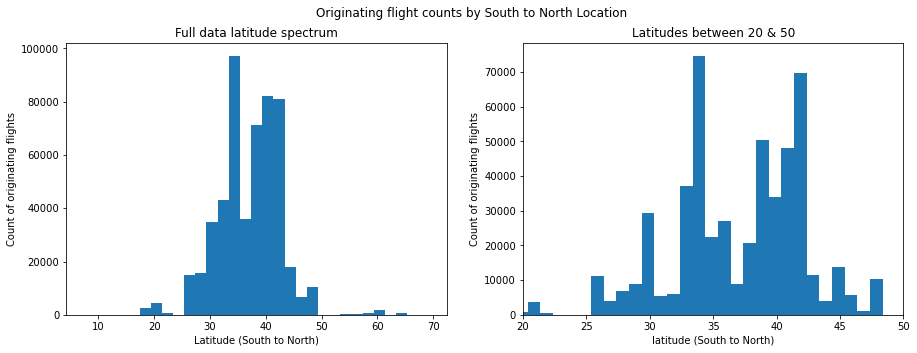

In [45]:
plt.figure(figsize = [15,5])

plt.suptitle('Originating flight counts by South to North Location')

bins = np.arange(loc_df.lat.min(), loc_df.lat.max(), 2)

plt.subplot(1,2,1)

plt.hist(data = loc_df, x = 'lat', bins=bins)
plt.title('Full data latitude spectrum')
plt.xlabel('Latitude (South to North)')
plt.ylabel('Count of originating flights')

plt.subplot(1,2,2)
bins = np.arange(loc_df.lat.min(), loc_df.lat.max(), 1)
plt.hist(data = loc_df, x = 'lat', bins=bins)
plt.xlim(20,50)
plt.xlabel('latitude (South to North)')
plt.ylabel('Count of originating flights')
plt.title('Latitudes between 20 & 50')

del loc_df;

Distribution of flight counts across latitude is not as clearly organized as longitude into discernible distrubitions. While there is clearly a grouping of the majority of the data in a specific range of that data, this would correspond with the longitude regions of the rest of the continental United States. Otherwise, the pattern of data distribution would suggest some specific higher travel latitudes within that group, but not a pattern that would fit within a normal or bimodal distribution.

#### Distance Traveled

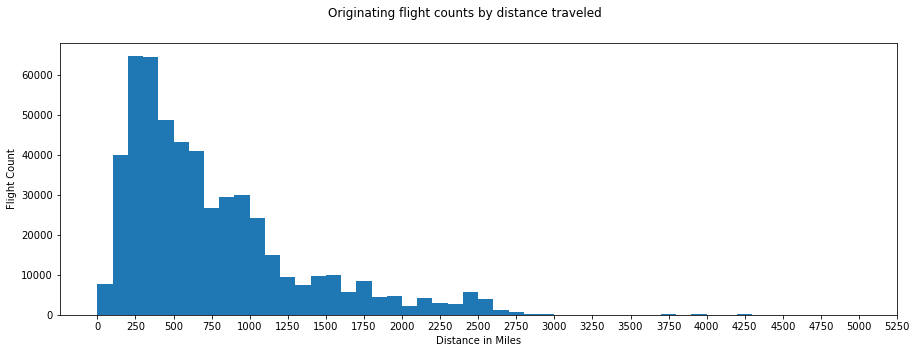

In [46]:
plt.figure(figsize = [15,5])

plt.suptitle('Originating flight counts by distance traveled')

bins = np.arange(0, 5000, 100)
ticks = np.arange(0,5500, 250)

plt.hist(data = data, x='Distance', bins = bins)
plt.xlabel('Distance in Miles')
plt.ylabel('Flight Count')
plt.xticks(ticks);

Distribution of distance is right skewing, with the bulk of flights peaking between 250 and 500 miles

In [47]:
data.Origin.value_counts()

ORD    28330
ATL    27848
DFW    24846
LAX    17623
PHX    14853
       ...  
PMD        1
SLE        1
LNY        1
MTH        1
ALO        1
Name: Origin, Length: 311, dtype: int64

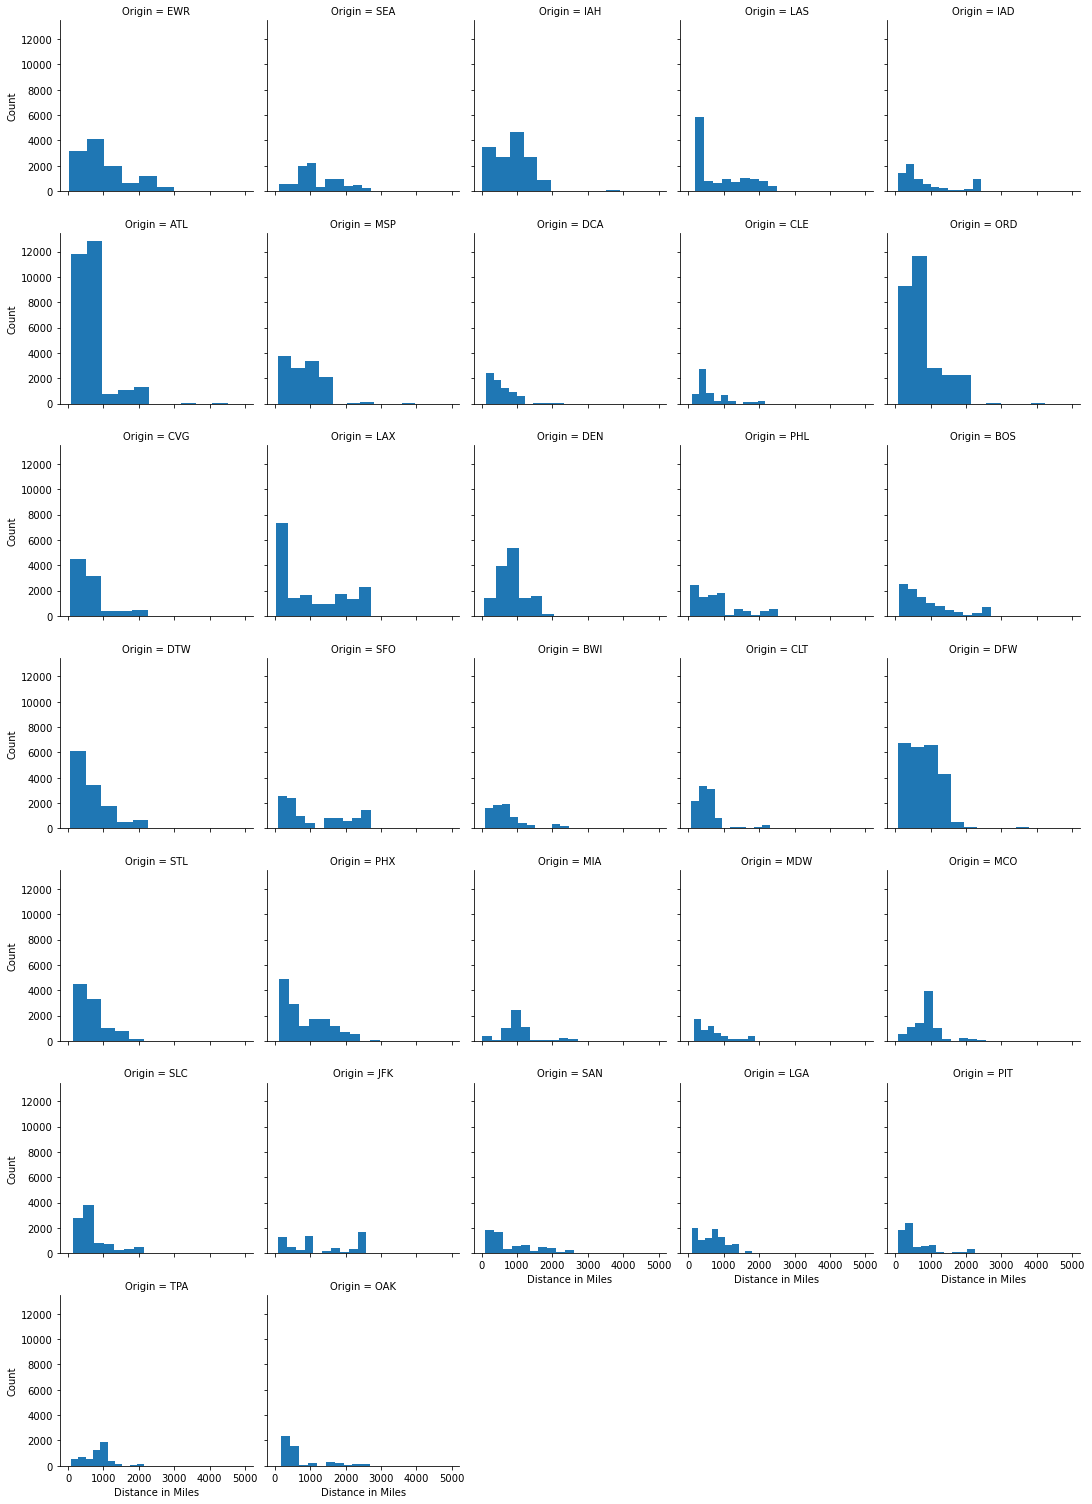

In [48]:
#filter all airports that handled more than 5000 flights in the data sample over the 10 years
plus5000 = data[data['Origin'].map(data['Origin'].value_counts()) > 5000]

#faceted grid of distance traveled by each airport in the filtered data
g = sb.FacetGrid(data = plus5000, col ='Origin', col_wrap = 5)
g.map(plt.hist, 'Distance')
g.set_axis_labels("Distance in Miles", "Count");

In [49]:
plus5000.Origin.nunique()

32

Due to the high number of individual airports in this dataset (300+), with many having a low count of flights Originating in that airport, a filter of 5000 flights is used to examine flight distance of individual airports.

Of the airports handling more than 5,000 flights, few handled any significant number of flights ove 2,000 miles, and most saw the largest number of flights between 0 and 1000 miles. The organization of the spread for distance of each flight varies wildly for each airport, with many showing a considerable difference between the number of flights under 1000 miles vs over 1000 miles, and others having a more normal distribution of flights between 0 and 2000 miles, or a right skewed distribution.

##### Flight Counts per location

Something of interest for this dataset is the amounf of traffic by location. Individual airports might have higher traffic than others, but looking at traffic coming out of particular geographc areas 

In [50]:
#Create dataframe of location data for airport codes with a count of total flights originating in each airport
Org_Flight_Count = data.groupby(['Origin',]).FlightNum.count().to_frame()
Org_Flight_Count.reset_index(inplace = True)
Org_Flight_Count.rename(columns= {'FlightNum':'Org_Count'}, inplace=True)
Location_Counts = airports[['iata','lat','long']].merge(Org_Flight_Count, left_on = 'iata', right_on = 'Origin', how='right')
Location_Counts.drop(['iata'],axis=1, inplace=True)
Location_Counts.head()

,lat,long,Origin,Org_Count
0,40.652363,-75.440402,ABE,454
1,32.411320,-99.681897,ABI,136
2,35.040222,-106.609194,ABQ,2810
3,31.535515,-84.194473,ABY,42
4,41.253052,-70.060181,ACK,12


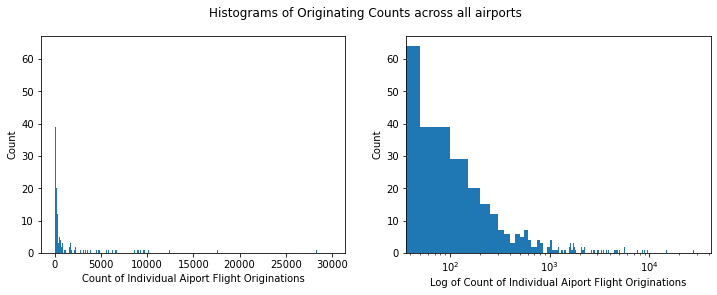

In [51]:
plt.figure(figsize = [12,4])
plt.suptitle('Histograms of Originating Counts across all airports')


plt.subplot(1,2,1)
plt.hist(data=Location_Counts, x='Org_Count', bins = np.arange(0, 30000,50))
plt.ylabel('Count')
plt.xlabel('Count of Individual Aiport Flight Originations')


plt.subplot(1,2,2)
plt.hist(data=Location_Counts, x='Org_Count', bins = np.arange(0, 30000,50))
plt.xscale('log')
plt.xlabel('Log of Count of Individual Aiport Flight Originations')
plt.ylabel('Count');

In [52]:
#Create dataframe of average distance traveled data for airport codes
Avg_Dist = data.groupby(['Origin',]).Distance.mean().to_frame()
Avg_Dist.reset_index(inplace = True)
Avg_Dist.rename(columns= {'Distance':'avg_dist'}, inplace=True)
Avg_Dist = airports[['iata','lat','long']].merge(Avg_Dist, left_on = 'iata', right_on = 'Origin', how='right')
Avg_Dist.drop(['iata'],axis=1, inplace=True)
Avg_Dist.head()

,lat,long,Origin,avg_dist
0,40.652363,-75.440402,ABE,473.878855
1,32.411320,-99.681897,ABI,163.477941
2,35.040222,-106.609194,ABQ,635.260854
3,31.535515,-84.194473,ABY,146.000000
4,41.253052,-70.060181,ACK,213.250000


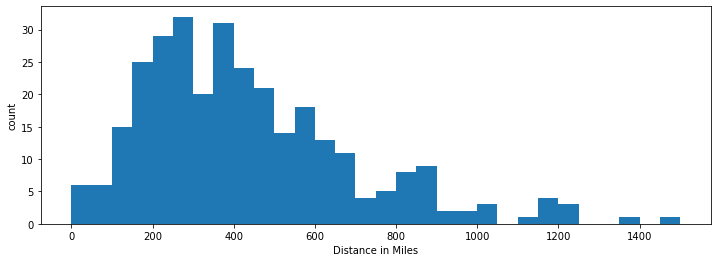

In [53]:
plt.figure(figsize = [12,4])

plt.hist(data=Avg_Dist, x='avg_dist', bins = np.arange(0, Avg_Dist.avg_dist.max(), 50))
plt.ylabel('count')
plt.xlabel('Distance in Miles');

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

In the initial data examination it was clear that data in this dataset primarily covers individual states and territories within the United States. Since geographic data is of particular interest for this analysis, locations outside of the continental US, including Hawaii, Alaska, and territories such as Guam or Puerto Rico, can show as extreme outliers in the geographic data. To keep scaling apropriate for analysis, axis limits will be used where apropriate. 

Since departure and arrival destinations are different for each flight, excluding these observations from the dataset may cause problems, so they will continue to be included in the data, but axis limitations may be used in visualizations of geographic data to provide appropriate scaling that might exclude them from visualization.

The geographic data, including state, longitude and latitude data, showed varying distributions with very little discernible patterns. The relationship between this data and flight data such as flight counts and distance is of particular interest. For example, the relationship with individual airports and the number of flights originating from them, or their relation to other airports in close proximity.

Data was distributed in most variables in such a way that normal data scaling was sufficient, the exception being a histogram of flight counts per airport, which required a log scale for examination.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

Issues pertaining to data distribution and cleaniness were dealt with prior to univariate exploration. The initial dataset was too large to handle with available computer processing power and memory, so a sample dataset was created from the initial flight data for further exploration. To reduce resource need further, only variables pertaining to the necessary analysis of time, location and flight trip information were kept. Time data was also consolidated into a single variable of datetime type.

Beyond cleaning during gathering, outliers in the dataset have been noticed. Their inclusion remains relevant to the dataset as a whole and do not appear to skew calculations unreasonably so as to alter findings. Further analysis will focus on specific areas or groups of the data in which outliers will have little to no overall effect and will remain in the data set.

## Bivariate Exploration

A key area of interest for this analysis is the relationship of various factors with geographic information of originating airports.

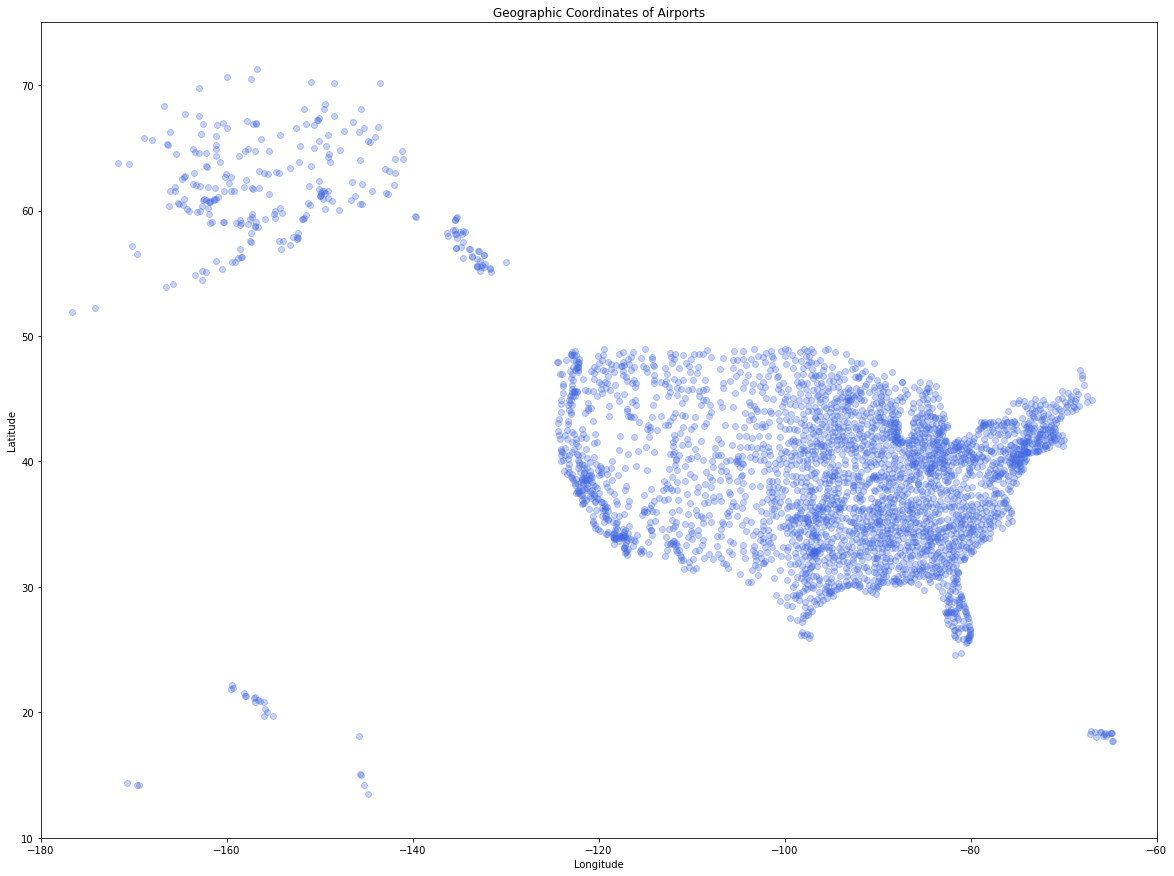

In [54]:
plt.figure( figsize = [20,15])
plt.scatter(data = airports, x='long', y = 'lat', alpha = .3, color = 'royalblue')
plt.xlim(-180, -60)
plt.ylim(10,75)

plt.title('Geographic Coordinates of Airports')
plt.xlabel('Longitude')
plt.ylabel('Latitude');

In [55]:
airports.long.min()

-176.6460306

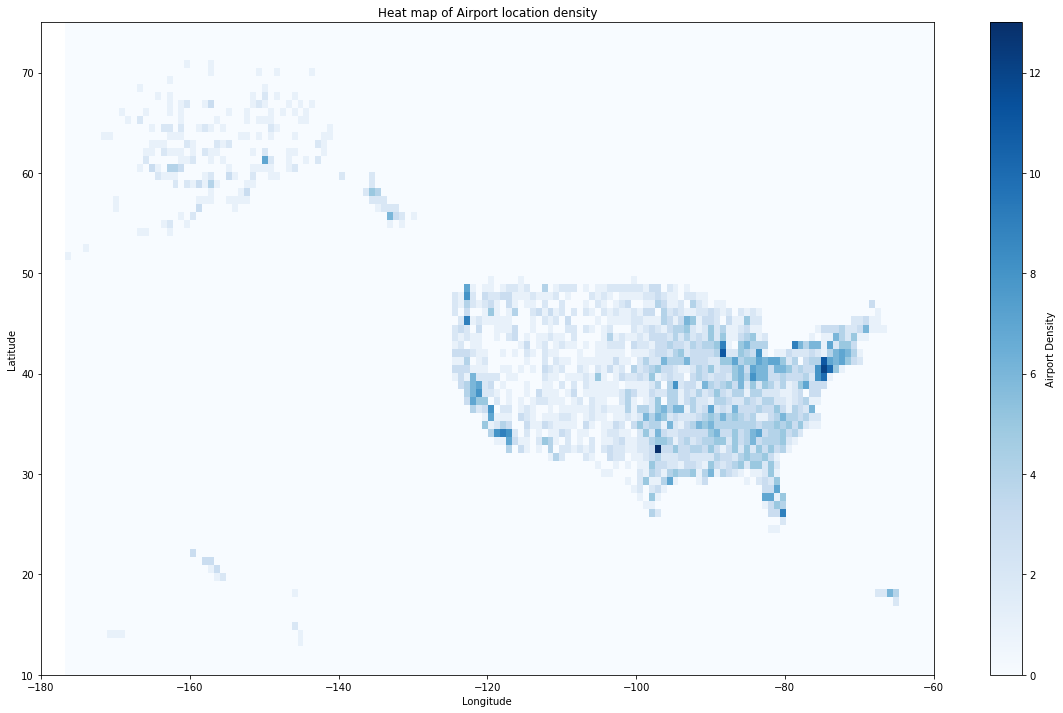

In [56]:
plt.figure( figsize = [20,12])

bins = np.arange(airports.long.min(), airports.long.max(), .8)

plt.hist2d(data = airports, x='long', y = 'lat', bins=bins, cmap = 'Blues')
plt.xlim(-180, -60)
plt.ylim(10,75)
plt.colorbar(label ='Airport Density')


plt.title('Heat map of Airport location density')
plt.xlabel('Longitude')
plt.ylabel('Latitude');

A scatterplot of geographic data from the airports data frame using longitude and latitude data assigned to each airport code for the x and y axis reveals a plot of the United States. With an alpha of .3 for the plot points, additional information is available for areas of airport coverage density.

The first and most apparent observation is that the Eastern half of the continental United States has a much higher density of airports than the Western half. Furthermore, a few darker areas in the North East, Surrounding the Great Lakes region and on the West coast are of note. Additional data would be needed on population data and population density to infer any relationship between airport density and relations to population density.

A heatmap of airport location counts provides an additional view of the data with the same findings.

One area of interest with this dataset is the amount of flight traffic each airport receives as compared to the typical trip distance of each flight.

In [57]:
#create list of 10 busiest airports
busiest = data.Origin.value_counts().nlargest(10).index.tolist()

In [58]:
airports[airports.iata.isin(busiest)  == True]

,iata,airport,city,state,country,lat,long
880,ATL,William B Hartsfield-Atlanta Intl,Atlanta,GA,USA,33.640444,-84.426944
1263,DEN,Denver Intl,Denver,CO,USA,39.858408,-104.667002
1268,DFW,Dallas-Fort Worth International,Dallas-Fort Worth,TX,USA,32.895951,-97.037200
1305,DTW,Detroit Metropolitan-Wayne County,Detroit,MI,USA,42.212059,-83.348836
1837,IAH,George Bush Intercontinental,Houston,TX,USA,29.980472,-95.339722
2037,LAS,McCarran International,Las Vegas,NV,USA,36.080361,-115.152333
2039,LAX,Los Angeles International,Los Angeles,CA,USA,33.942536,-118.408074
2327,MSP,Minneapolis-St Paul Intl,Minneapolis,MN,USA,44.880547,-93.216922
2531,ORD,Chicago O'Hare International,Chicago,IL,USA,41.979595,-87.904464
2618,PHX,Phoenix Sky Harbor International,Phoenix,AZ,USA,33.434167,-112.008056


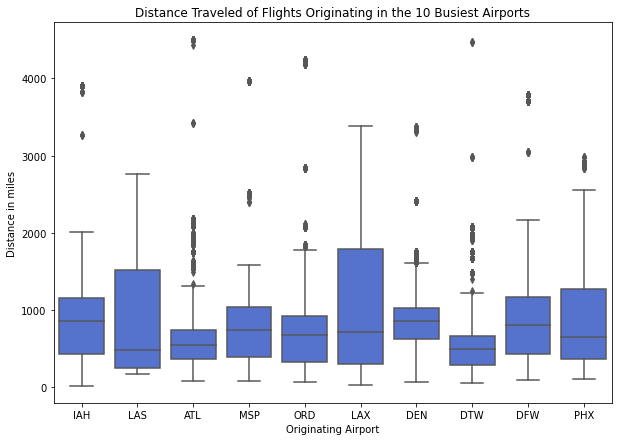

In [59]:
plt.figure(figsize=[10,7])

Top10 = data[data.Origin.isin(busiest)  == True]

sb.boxplot(data = Top10, x='Origin', y='Distance', color = 'royalblue')
plt.title('Distance Traveled of Flights Originating in the 10 Busiest Airports')
plt.ylabel('Distance in miles')
plt.xlabel('Originating Airport');

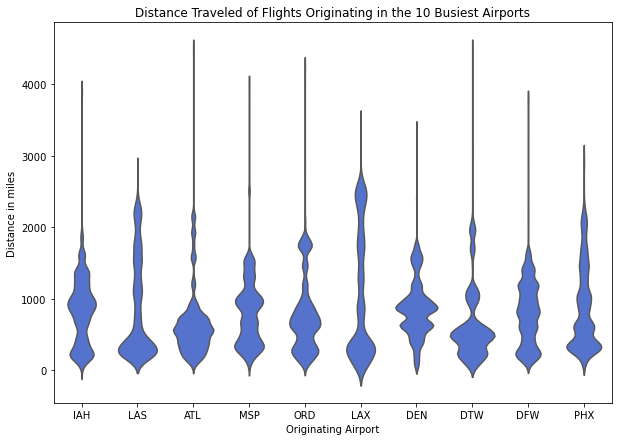

In [60]:
plt.figure(figsize=[10,7])

Top10 = data[data.Origin.isin(busiest)  == True]

sb.violinplot(data = Top10, x='Origin', y='Distance', color = 'royalblue', inner = None)
plt.title('Distance Traveled of Flights Originating in the 10 Busiest Airports')
plt.ylabel('Distance in miles')
plt.xlabel('Originating Airport');

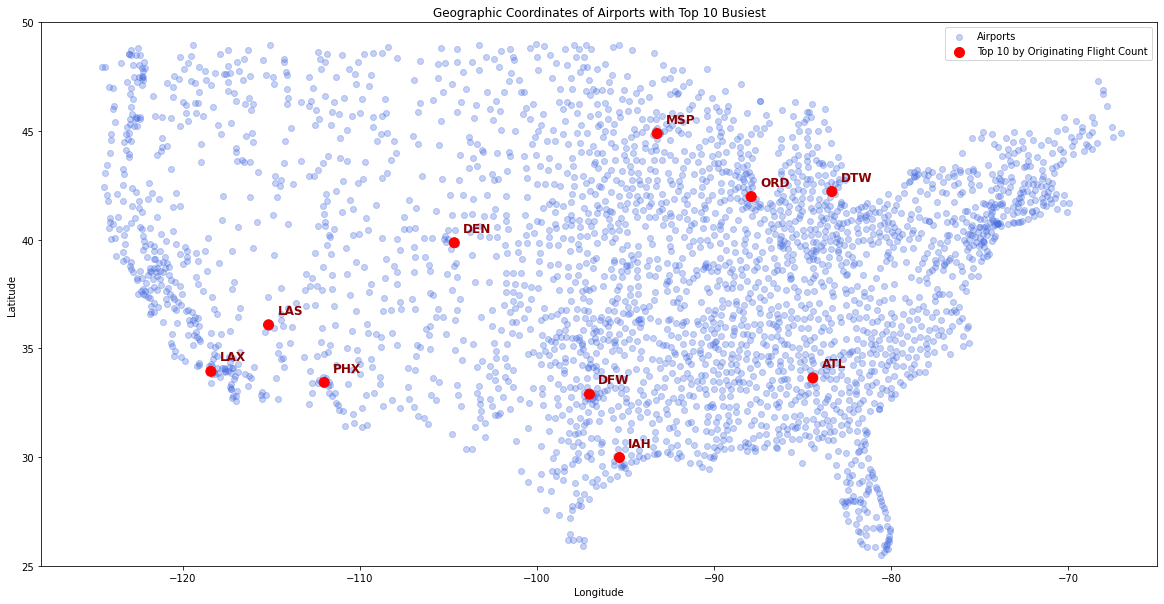

In [61]:
plt.figure( figsize = [20,10])
Top10 = airports[airports.iata.isin(busiest)  == True]

plt.scatter(data = airports, x='long', y = 'lat', alpha = .3, color = 'royalblue', label='Airports')

plt.scatter(data = Top10, x='long', y= 'lat', color='red', sizes =[100,100], label='Top 10 by Originating Flight Count')

for i in (Top10.iata.tolist()):
    txt = Top10[Top10['iata'] == i].iata.item()
    x = Top10[Top10['iata'] == i].long.item()
    y = Top10[Top10['iata'] == i].lat.item()
    plt.annotate(txt, (x+.5,y+.5), fontsize='large', fontweight = 'demi', color = 'darkred')
    

plt.title('Geographic Coordinates of Airports with Top 10 Busiest')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# All 10 of the Top 10 airports for fligh distance by originating flights are within the continental United States
# for that reason, the x and y axis will be limited to longitude and latitude ranges that correspond only with locations
# within that range.
plt.ylim(25,50)
plt.xlim(-128,-65)

plt.legend();

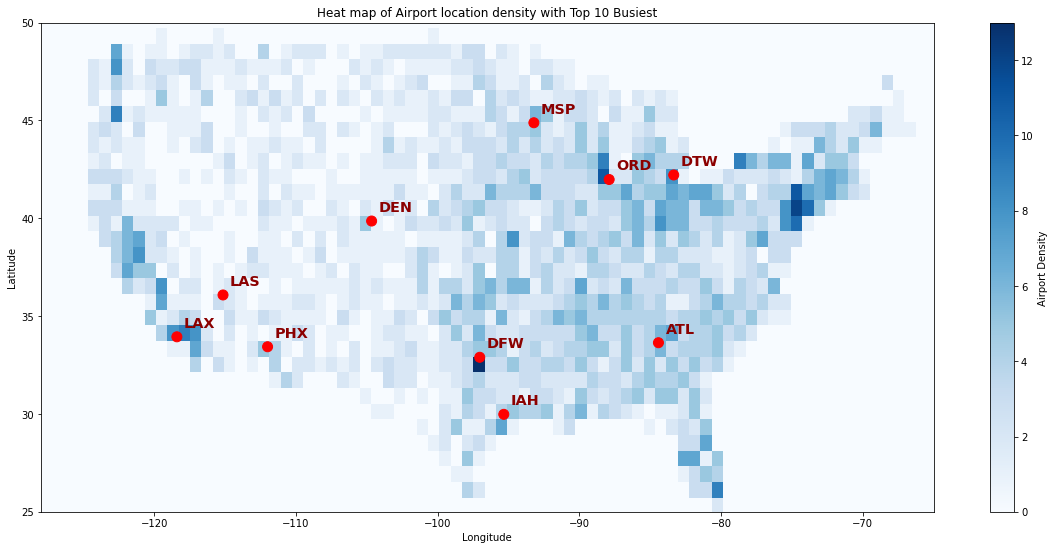

In [62]:
plt.figure( figsize = [20,9])

bins = np.arange(airports.long.min(), airports.long.max(), .8)

plt.hist2d(data = airports, x='long', y = 'lat', bins=bins, cmap = 'Blues')
plt.ylim(25,50)
plt.xlim(-128,-65)
plt.colorbar(label ='Airport Density')

plt.scatter(data = Top10, x='long', y= 'lat', color='red', sizes =[100,100], label='Top 10 by Originating Flight Count')

for i in (Top10.iata.tolist()):
    txt = Top10[Top10['iata'] == i].iata.item()
    x = Top10[Top10['iata'] == i].long.item()
    y = Top10[Top10['iata'] == i].lat.item()
    plt.annotate(txt, (x+.5,y+.5), fontsize='x-large', fontweight = 'demi', color = 'darkred')

plt.title('Heat map of Airport location density with Top 10 Busiest')
plt.xlabel('Longitude')
plt.ylabel('Latitude');

Looking at the 10 busiest airports and a comparison of their distance traveled data as well as their geographic location in the country and relationship with density of surrounding airports reveals a few interesting findings.

First, the data on distance traveled for flights originating in the Top 10 airports reveals some interesting differences. LAX, located in Los Angeles, CA, and ATL, located in Atlanta, GA, have a stark difference in their quartile ranges for distance traveled. Despite both having a relatively close average distance traveled for originating flights, LAX has a much wider range of overal flight distances, with an upper quartile that exceeds 2,000 miles. ATL however, has a much narrower range of distance traveled for originating flights.

A similar range of distance traveled to LAX can be seen with LAS, located in Las Vegas, NV. The same similarity to ATL can be seeen in DEN, located in Denver, CO and DTW, located in Detriot, MI.

DEN also shows an interesting characteristic in that its mean for flight distance is one of the highest in the group, despite having a much narrow range of flights, where its upper quartile range is one of the lowest.

The geographic data in the second plot reveals additional observations in regards to the top 10 busiest airports by flight origination count versus other airport locations in the data set.

Despite having a high density cluster of airports in the North East section of the plot, there are no Top 10 airports in that region. Rather, LAX, ORD and DTW are the only airports in areas of highly dense airport locations, and DEN, PHX and LAS, also TOP 10 airports, are in located within areas with the lowest airport density in the plot.

## Multivariate Exploration

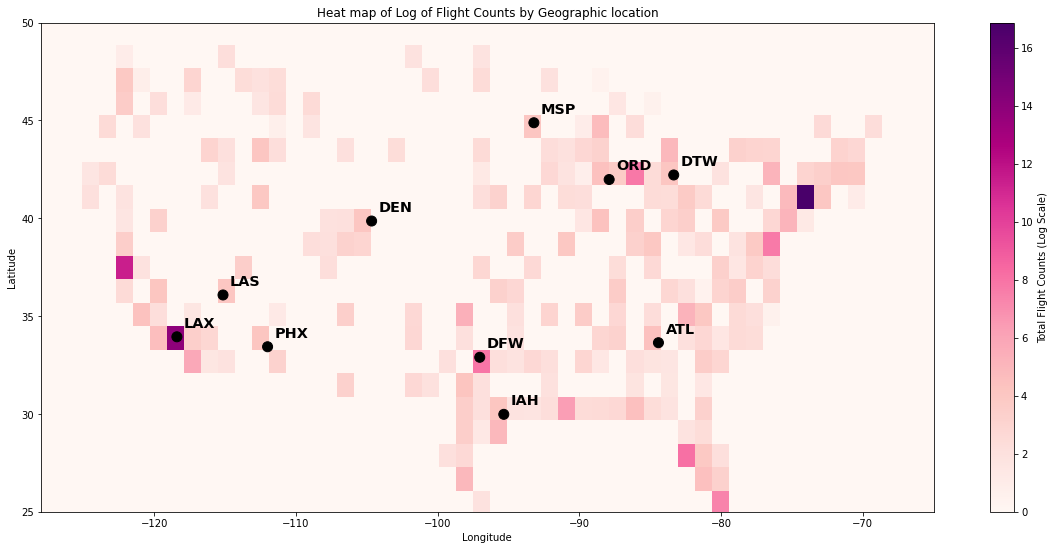

In [63]:
plt.figure( figsize = [20,9])

xbins = np.arange(Location_Counts.long.min(), Location_Counts.long.max(), 1.2)
ybins = np.arange(Location_Counts.lat.min(), Location_Counts.lat.max(), 1.2)

plt.hist2d(data = Location_Counts, x='long', y = 'lat', weights = np.log10(Location_Counts.Org_Count),
           bins =[xbins, ybins], cmap='RdPu')
plt.ylim(25,50)
plt.xlim(-128,-65)
plt.colorbar(label ='Total Flight Counts (Log Scale)')


plt.scatter(data = Top10, x='long', y= 'lat', color='black', sizes =[100,100], label='Top 10 by Originating Flight Count')

for i in (Top10.iata.tolist()):
    txt = Top10[Top10['iata'] == i].iata.item()
    x = Top10[Top10['iata'] == i].long.item()
    y = Top10[Top10['iata'] == i].lat.item()
    plt.annotate(txt, (x+.5,y+.5), fontsize='x-large', fontweight = 'demi', color = 'black')

plt.title('Heat map of Log of Flight Counts by Geographic location')
plt.xlabel('Longitude')
plt.ylabel('Latitude');

A heatmap of the Log of originating flight counts by geographic location represented by a plot of longtitude and latitude variables indicates areas of higher flight counts by georgraphic location.
A scatter plot of the the 10 airport codes with the highest originated flight counts overlayed on the heatmap show the relationship between the busiest airports, and the busiest geographic regions.

In [64]:
data.Origin.nunique(), airports.iata.nunique()

(311, 3376)

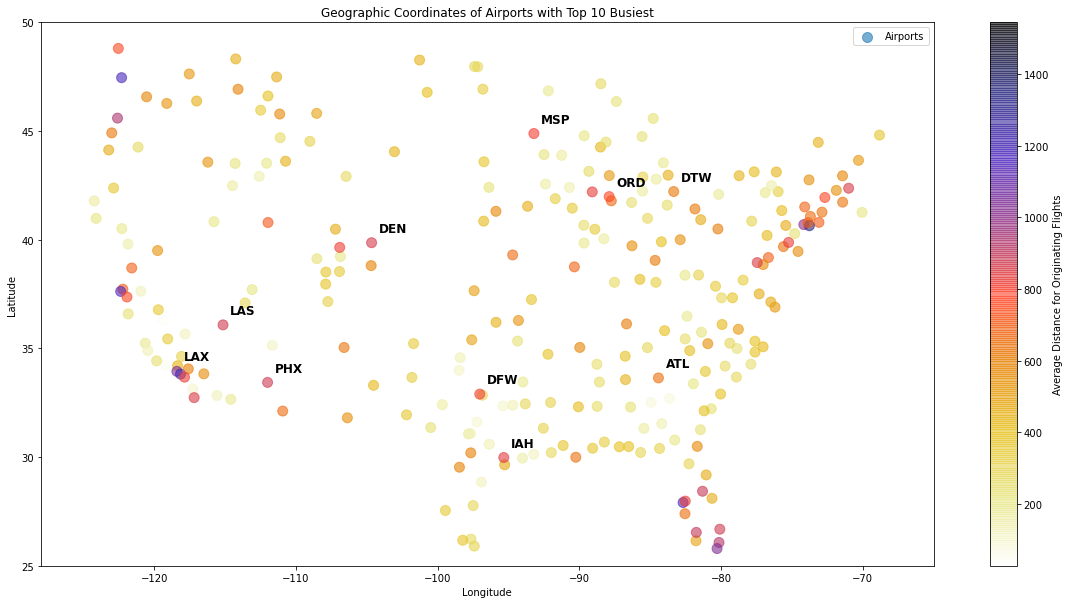

In [65]:
plt.figure( figsize = [20,10])
Top10 = airports[airports.iata.isin(busiest)  == True]

plt.scatter(data = Avg_Dist, x='long', y = 'lat', c='avg_dist', sizes =[100,100], cmap = 'CMRmap_r', label='Airports', alpha=.6)
plt.colorbar(label = 'Average Distance for Originating Flights')


for i in (Top10.iata.tolist()):
    txt = Top10[Top10['iata'] == i].iata.item()
    x = Top10[Top10['iata'] == i].long.item()
    y = Top10[Top10['iata'] == i].lat.item()
    plt.annotate(txt, (x+.5,y+.5), fontsize='large', fontweight = 'demi', color = 'black')
    

plt.title('Geographic Coordinates of Airports with Top 10 Busiest')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.ylim(25,50)
plt.xlim(-128,-65)

plt.legend();

A scatterplot of each aiport codes' longitude, latitude and color mapped according to average distance for each flight originiating in that airport, as well as labels for the 10 aiports with the highest flight count help illustrate the relationship between location and distance traveled, as well as the comparison of average distance traveled of each airport in relation to its neighboring airports.

# Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

The plots of geographic data alongside other variables reveals some truths to traffic out of each airport not seen in the examination of geographic data only.

First and most apparent is by looking at traffic both in number of flights originating in each geographic location as well as the average distance of flights originiating in each airport reveals a large gap between the number of airports represented in the airport data, and the number of airports with originating flight information.

In the airports data frame there are 3376 unique airports listed, however in the flight data frame, airports in which a flight originated accounts for around 315 (actualy number dependant on original sampe of "flights" data).

The absence of data for the ~3,000 airports in the data set can only be explained as they have no originating flights listed in the data sample that fit the parameters of the original data source. The source for this data, The U.S. DOT Bureau of Transportation Statistics, describes the data available in the following overview:

> This database contains scheduled and actual departure and arrival times reported by certified U.S. air carriers that account for at least one percent of domestic scheduled passenger revenues. The data is collected by the Office of Airline Information, Bureau of Transportation Statistics (BTS).

Therefore, flights within this dataset must fit within the following criteria:
1. A passenger flight
2. From a U.S. Carrier
3. Carrier accounts for > 1% of domestic scheduled passenger revenue

The second observation is available in the plot 'Heat map of Log of Flight Counts by Geographic location'
When total numer of flight originations are counted within the constraints of longtitude and latitude, a number of high count geographic areas are visible that do not correspond with an airport in the highest count of originating flights.
In fact LAX is the only airport of the top 10 airports for flight originiations that lies in an area that is also in the highest areas for flight originations.
When looking at flight originations as an indicator for flight traffic, high traffic geographic areas do not strongly correlate with high traffic airports and high traffic airports do not correlate with high traffic geographic areas.

Next, when each airport's longitude and latitude are plotted using originating flights average trip distance some other key findings are clear. First, airports with the highest average distance, colored in dark purple, all appear at the edges of the data. LAX is again the only airport in the Top 10 busiest that also shares a value for highest count in this plot. 

The other 10 however appear to fall near or above the median value for the average distance for orginating flights. Even airports like DEN, DFW, ATL and IAH, which appear in areas of the plot less densely populated by other airports and by airports with much lower values for average distance traveled by originating flights. This when compared with their high flight origination count shows that these airports are standouts in that they: originate a much higher number of flights than others in the geographic region and those flights on average travel much further.

### Were there any interesting or surprising interactions between features?

When examinging traffic in terms of the count of originating flights. the most surprising observation in this data was the relationship between high traffic geographic areas represented by longtitude and latitude values versus the highest traffic airports represented by individual airport codes. When plotted together the data would indicate that the highest traffic geographic areas and highest traffic airports do not share a direct correlation.
In conjuction with data on average trip distance it appears that within larger areas of the geographic data there are standout airports. While a larger share of airports handle traffic with traffic below the median of average distances, high traffic airports tend to handle traffic above the median.
So while many airports tend to handle traffic flying within their larger region, the highest traffic airports would appear to handle traffic flying outside of those larger regions.